In [15]:
import cv2
import numpy as np
import math as m
from histogram import Histogram

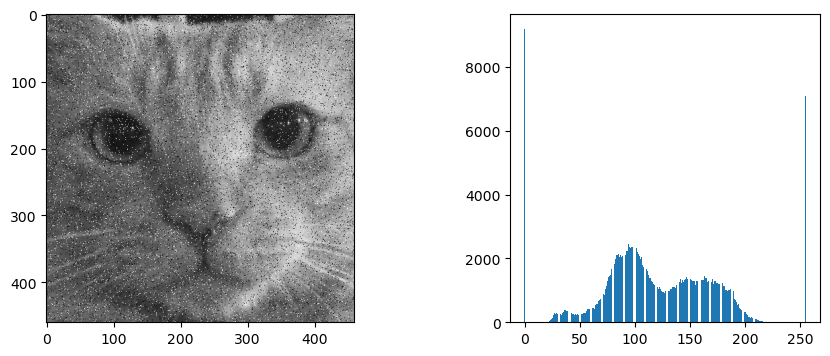

In [2]:
img = cv2.imread('../img/noise.png', cv2.IMREAD_GRAYSCALE)
hist = Histogram(img)
hist.calc_and_plot()

In [17]:
class MedianFilter:
  def __init__(self, img , kernel_size):
    self.img = np.array(img)
    self.original = self.img
    self.img_size_lin, self.img_size_col, *_ = self.img.shape
    self.kernel_size = kernel_size
    self.central = m.floor((kernel_size / 2))
    self.padding = np.zeros((self.img_size_lin + self.central * 2, self.img_size_col + self.central * 2))

  def _filter(self):
    self.padding[(0 + self.central):(self.img_size_lin + self.central), (0 + self.central):(self.img_size_col + self.central)] = self.img.copy()
    buffer = np.zeros((self.kernel_size * self.kernel_size))
    final_array = np.zeros(self.img.shape)
    for j in range(0, self.img_size_lin):
      for k in range(0, self.img_size_col):
        for kl in range(0, self.kernel_size):
          for kk in range(0, self.kernel_size):
            buffer[(self.kernel_size * kl + kk)] = (self.padding[j + kl, k + kk])

        buffer = np.sort(buffer)
        value = buffer[int(np.floor((self.kernel_size ** 2) / 2))]
        final_array[j, k] = value

    final_array = np.uint8(final_array)
    print("FINISHED")
    return final_array

  def run_test(self, num_increments):
        original = self.original
        aux = np.zeros((self.img_size_lin, self.img_size_col))
        auxs = [original]
       # print(original)
        # plt.imshow(original, 'gray')
        # plt.title('Original')
        # plt.show()

        for i in range(num_increments):
            aux[:, :] = self._filter()
            #print(f"{i}\n", aux)
            auxs.append(aux.copy())
            self.img = aux.copy()

        # plt.imshow(aux, 'gray')
        # plt.title(f'Filtered - Iteration {i + 1}')
        # plt.show()
        #cv2.imwrite(f'filtered_median_image_k{self.kernel_size}_n{num_increments}.png',aux)
        self.img = original.copy()
        return aux


FINISHED


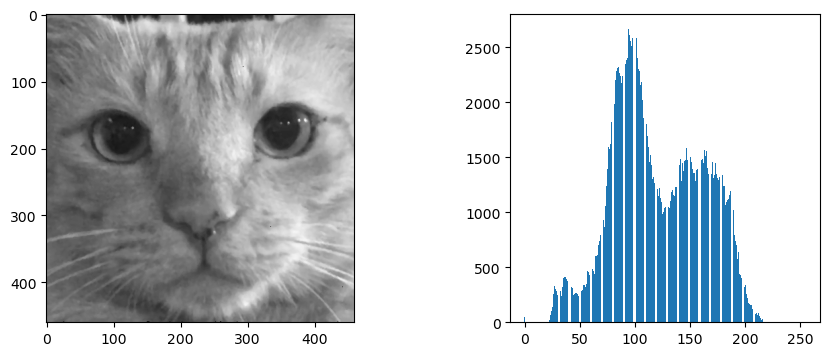

In [18]:
median = MedianFilter(img, 3)
new_img = median.run_test(1)
hist2 = Histogram(new_img)
hist2.calc_and_plot()